# Trabajo opcional de subida de nota en Sistemas Inteligentes

## Implementación de algoritmo de cálculo de extensiones preferidas

### Autor: Arnau Neches Vilà

**Nota previa**: He decido tipar todo el proyecto a pesar de usar python para que fuese más entendible.

In [2]:
from typing import List, Set, Optional, Dict
import networkx as nx
import matplotlib.pyplot as plt

En primer lugar he programado la clase NodoArgumento que nos sirve para almacenar el nombre de un nodo (argumento), los argumentos a los que ataca y por los que es atacado. Además incluye un método para que se pueda crear un nuevo ataque (Nueva arista dirigida). Explicación breve:

- **nodo.atacados**: Set de nodos a los que nuestro nodo ataca (Lo que en clase vimos como a+).
- **nodo.atacantes**: Set de nodos que atacan a nuestro nodo (Lo que en clase vimos como a-).
- **ataca(NodoArgumento)**: Crea la relación de ataque (Tanto refutación como debilitación) añadiendo el nodo pasado por parámetro a su set de atacados y añadiendo nuestro nodo al set de atancantes del parámetro nodo.

In [3]:
class NodoArgumento:
    def __init__(self, nombre: str):
        self.nombre = nombre
        self.atacados = set()
        self.atacantes = set()
    
    def __str__(self) -> str:
        atacados_nombres = {n.nombre for n in self.atacados}
        atacantes_nombres = {n.nombre for n in self.atacantes}
        return f"Nodo {self.nombre} ataca a: {atacados_nombres} y es atacado por: {atacantes_nombres}"
    
    def __repr__(self) -> str:
        return f"Nodo {self.nombre}"

    def ataca(self, atacado: "NodoArgumento"):
        self.atacados.add(atacado)
        atacado.atacantes.add(self)


Tras esto cree la clase GrafoArgumentativo que en esencia es un conjunto de nodos con algunos metodos interesantes. Aquí una explicación de sus métodos.

- **añadir_nodo(NodoArgumento)**: Añade un nodo al conjunto de nodos del grafo.
- **obtener_nodo(str) -> NodoArgumentativo**: Devuelve el nodo del conjunto que tiene como nombre el parámetro pasado.
- **ataque(NodoArgumento, NodoArgumento)**: Crea una relación de ataque entre los nodos.
- **mostrar_relaciones()**: Muestra por consola cada nodo y los nodos a los que este ataca.
- **es_valido() -> bool**: Devuelve True en caso de que nuestro grafo sea valido, es decir, todos los nodos que aparecen como atancantes o atacados están en el conjunto de nodos. En caso contrario devuelve False.
- **dibujar_grafo()**: Utilizando la librería networkx y matplotlib muestra en pantalla el grafo con sus aristas.



In [4]:
class GrafoArgumentativo:
    def __init__(self, nombre: str, nodos: Optional[Set["NodoArgumento"]] = None):
        self.nombre = nombre
        self.nodos = nodos if nodos is not None else set()
    
    def __str__(self) -> str:
        nombres = {n.nombre for n in self.nodos}
        return f"El grafo argumentativo {self.nombre} contiene los siguientes nodos: {nombres}"
    
    def añadir_nodo(self, nodo: "NodoArgumento"):
        self.nodos.add(nodo)
    
    def obtener_nodo(self, nombre: str) -> Optional["NodoArgumento"]:
        for nodo in self.nodos:
            if nodo.nombre == nombre:
                return nodo
        return None
    
    def ataque(self, atacante: "NodoArgumento", atacado: "NodoArgumento"):
        atacante.ataca(atacado)
    
    def mostrar_relaciones(self):
        for nodo in self.nodos:
            for atacado in nodo.atacados:
                print(f"{nodo.nombre} -> {atacado.nombre}")
        
    def es_valido(self) -> bool:
        for nodo in self.nodos:
            if not nodo.atacados.issubset(self.nodos) or not nodo.atacantes.issubset(self.nodos):
                return False
        return True
    
    def dibujar_grafo(self):
        G = nx.DiGraph()
        for nodo in self.nodos:
            G.add_node(nodo.nombre)
            for atacado in nodo.atacados:
                G.add_edge(nodo.nombre, atacado.nombre)
    
        nx.draw(G, with_labels=True, arrows=True, node_color="lightblue")
        plt.title(self.nombre)
        plt.show()
    
    
    

Aquí se muestra la implementación del operador de extensión básica que en clase hemos visto como E(.) Una explicación:

- **operador_extension_basica(Set[NodoArgumento], GrafoArgumentativo) -> Set[NodoArgumento]**: Recibe como parámetros un conjunto de argumentos a los que le queremos aplicar el operador y el grafo completo y devuelve el resultado del operador.

In [19]:
def operador_extension_basica(argumentos: Set["NodoArgumento"], grafo: GrafoArgumentativo) -> Set["NodoArgumento"]:
    resultado = set()
    # 1. Calculo todos los nodos que son atacados por los argumentos del conjunto
    atacados = set()
    for nodo in argumentos:
        atacados.update(nodo.atacados)
    # 2. Recorremos todos los nodos del grafo completo
    for nodo in grafo.nodos:
        # 3. Si es defendido por el conjunto (Sus atacantes son atacados por los atacados de los argumentos iniciales) y no es atacado por el conjunto,
        # se añade al resultado
        if nodo.atacantes.issubset(atacados) and nodo not in atacados:
            resultado.add(nodo)
    return resultado    

Aquí se implementa el algoritmo de cálculo de extensión básica aplicando reiteradamente el operador E(.), explicación:

- **calculo_extension_basica(GrafoArgumentativo) -> Set[NodoArgumento]**: Recibe un sistema argumentativo y devuelve la extensión básica.

In [20]:
def calculo_extension_basica(grafo: GrafoArgumentativo) -> Set["NodoArgumento"]:
    # 1. Inicio con el conjunto vacio
    actual = set()
    while True:
        # 2. Le aplico el operador E() al conjunto actual 
        auxiliar = operador_extension_basica(actual, grafo)
        # 3. En caso de encontrar un punto fijo lo devolvemos, hemos acabado el algoritmo
        if auxiliar == actual:
            return actual
        # 4. En caso de no ser punto fijo continuamos
        else:
            actual = auxiliar

Tras la creación de las dos clases auxiliares y los métodos de extensiones básicas, programé el algoritmo de clase de cálculo de extensiones preferidas y estables. Este algoritmo podría ser un método de la clase GrafoArgumentativo pero al final me decidí por hacerlo una función separada. En resumen es:

- **calcular_extensiones_preferidas(GrafoArgumentativo) -> tuple[List[Set["NodoArgumento"]], List[Set["NodoArgumento"]]]**: Devuelve una tupla con dos listas, la primera las extensiones preferidas y la segunda las estables. 

In [ ]:
IN = "IN"
OUT = "OUT"
BLANK = "BLANK"
MUST_OUT = "MUST-OUT"
UNDEC = "UNDEC"

def calcular_extensiones_preferidas(grafo: GrafoArgumentativo) -> tuple[List[Set["NodoArgumento"]], List[Set["NodoArgumento"]]]:

    # Primero se definen dos funciones auxiliares, una encargada de bifurcar y hacer el backtracking y otra encargada de etiquetar nodos

    #Función que se encarga del backtracking, comprueba si un nodo es hoja, en caso de no serlo se bifurca por una etiqueta que esté en BLANK
    def backtracking(etiquetas_actuales: Dict["NodoArgumento", str]):

        # 1. Si no hay BLANK estamos ante una hoja final por lo que no se hace más backtracking (se hace el return vacio)
        # Por lo tanto, revisamos que no haya conflictos (No hay MUST OUT) y añadimos la extensión si no está contenida en ninguna ya existente (Comprobación de maximalidad).
        # Cabe recalcar que por como hacemos el algoritmo nunca una nueva candidata a extensión va a contener a una anterior ya calculada (Esto ha sido explicado en clase) 
        # esto significa que no hay que comprobarlo y eliminar nada de la lista de extensiones. 
        if BLANK not in etiquetas_actuales.values():
            if MUST_OUT not in etiquetas_actuales.values():
                extension = {nodo for nodo, etiqueta in etiquetas_actuales.items() if etiqueta == IN}
                # Evitar extensiones contenidas en otras ya guardadas (maximalidad)
                if not any(extension < ext for ext in extensiones[0]):
                    extensiones[0].append(extension)
                    # En caso de solo haber IN y OUT será además extensión estable por lo que se añade a la lista de estables
                    if set(etiquetas_actuales.values()) == {IN, OUT}:
                        extensiones[1].append(extension)
            return
        
        # 2. Comprobamos que no estemos en una rama que se puede cerrar, esto es: que MOUT no esté en BLANK+ (No vamos a conseguir admisibilidad) 
        # o que IN unión BLANK está contenida en alguna extensión ya calculada (No vamos a conseguir maximalidad)

        # 2a. Comprobación de MOUT no en BLANK+
        # Nos guardamos los nodos en BLANK y en MOUT
        arg_blank = {n for n, etiqueta in etiquetas_actuales.items() if etiqueta == BLANK}
        arg_mout = {n for n, etiqueta in etiquetas_actuales.items() if etiqueta == MUST_OUT}
        # Calculamos BLANK+
        atacadas_por_blank = set()
        for nodo in arg_blank:
            atacadas_por_blank.update(nodo.atacados)
        # En caso de MOUT no contenido en BLANK+ se hace un return (Cierre de rama)
        if not arg_mout.issubset(atacadas_por_blank):
            return
        
        # 2b. Comprobación de maximalidad, IN U BLANK no contenido en alguna extensión preferida
        # Me guardo IN y hago IN U BLANK
        arg_in = {n for n, etiqueta in etiquetas_actuales.items() if etiqueta == IN}
        arg_in_blank = arg_in.union(arg_blank)
        #Recorro la extensiones ya calculadas y en caso de estar contenido en alguna cerramos la rama (return vacio)
        for ext in extensiones[0]:
            if arg_in_blank.issubset(ext):
                return



        # 3. Elegir un nodo BLANK para bifurcar. En este caso estoy eligiendo como heurística el nodo que mas atacantes y atacados tiene pues es candidato a que aparezcan muchos
        # OUT y MUST OUT acortando así el recorrido.
        # nodo_a_etiquetar = next(n for n, etiqueta in etiquetas_actuales.items() if etiqueta == BLANK)
        nodo_a_etiquetar = max(arg_blank, key= lambda n: len(n.atacados) + len(n.atacantes))

        # 4. Rama 1: Etiquetar nodo como IN y propagar etiquetas.
        etiquetas_nueva_1 = etiquetas_actuales.copy()
        etiquetar_in(nodo_a_etiquetar, etiquetas_nueva_1)
        backtracking(etiquetas_nueva_1)

        # 5. Rama 2: Etiquetar nodo como UNDEC
        etiquetas_nueva_2 = etiquetas_actuales.copy()
        etiquetas_nueva_2[nodo_a_etiquetar] = UNDEC
        backtracking(etiquetas_nueva_2)

    # Función para propagar etiquetas tras marcar IN
    def etiquetar_in(nodo: "NodoArgumento", etiquetas: Dict["NodoArgumento", str]):
        etiquetas[nodo] = IN

        # {x}+: atacados por nodo a estos se les añade OUT. No hay que comprobar si están IN (Para evitar conflicto interno) ya que en caso de estarlo
        # este nodo no se podría haber seleccionado porque estaría marcado como MUST-OUT
        for atacado in nodo.atacados:
            etiquetas[atacado] = OUT

        # {x}-: atacantes de nodo. Se añade la etiqueta MUST-OUT en caso de que un atacante no esté atacado o por el nod que introducimos o por otro
        # ya añadido anteriormente en el árbol (En caso de ser atacado por otro estaría en OUT, por lo que ya estaríamos defendidos de él)
        atacantes = nodo.atacantes
        atacados = nodo.atacados
        for atacante in atacantes:
            if atacante not in atacados and etiquetas[atacante] != OUT:
                etiquetas[atacante] = MUST_OUT


    # Comenzamos creando el nodo inicial y la lista de extensiones que iremos rellenando
    etiquetas: Dict["NodoArgumento", str] = {nodo: BLANK for nodo in grafo.nodos}
    extensiones: tuple[List[Set["NodoArgumento"]], List[Set["NodoArgumento"]]] = ([],[])

    # Ahora vamos a modificar el nodo inicial de modo que se inicialice con la extension básica
    extension_basica = calculo_extension_basica(grafo)
    for nodo_a_etiquetar in extension_basica:
        etiquetar_in(nodo_a_etiquetar, etiquetas)
        
    #Por úlitmo llamamos a backtracking con el nodo inicial que se encargará de hacerlo todo recursivamente y devlvemos la resultante lista de extensiones
    backtracking(etiquetas)
    return extensiones


#### Ejemplo 1:

Sistema argumentativo de la diapositiva 55 de los apuntes de la asignatura.

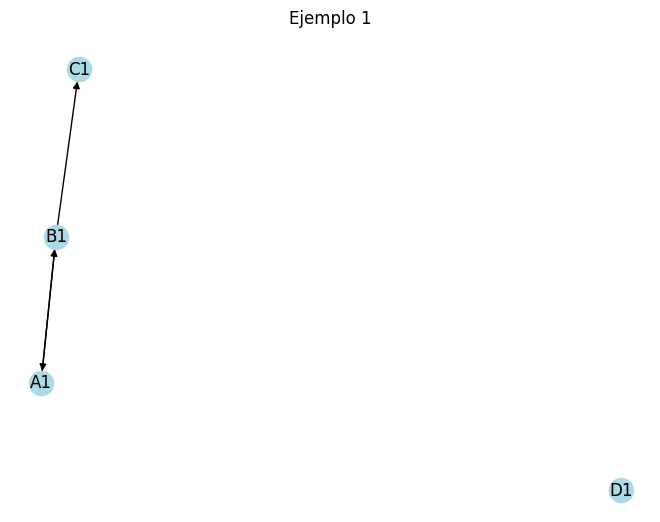

In [63]:
A1 = NodoArgumento("A1")
B1 = NodoArgumento("B1")
C1 = NodoArgumento("C1")
D1 = NodoArgumento("D1")
A1.ataca(B1)
B1.ataca(A1)
B1.ataca(C1)

Grafo1 = GrafoArgumentativo("Ejemplo 1", {A1,B1,C1,D1})
Grafo1.dibujar_grafo()

In [64]:
print("Las extensiones preferidas calculadas son: " + str(calcular_extensiones_preferidas(Grafo1)[0]))
print("La extensión básica es: " + str(calculo_extension_basica(Grafo1)))

Las extensiones preferidas calculadas son: [{Nodo B1, Nodo D1}, {Nodo A1, Nodo C1, Nodo D1}]
La extensión básica es: {Nodo D1}


#### Ejemplo 2:

Sistema argumentativo de la diapositiva 50 de los apuntes.

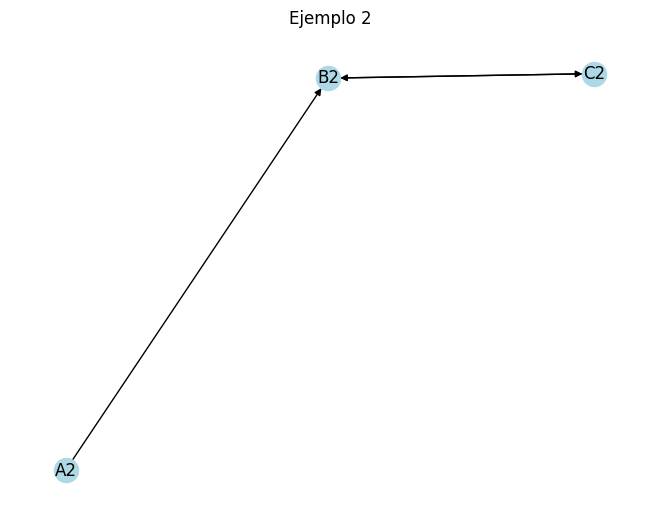

In [65]:
A2 = NodoArgumento("A2")
B2 = NodoArgumento("B2")
C2 = NodoArgumento("C2")
A2.ataca(B2)
C2.ataca(B2)
B2.ataca(C2)

Grafo2 = GrafoArgumentativo("Ejemplo 2", {A2, B2, C2})
Grafo2.dibujar_grafo()

In [66]:
print("Las extensiones preferidas calculadas son: " + str(calcular_extensiones_preferidas(Grafo2)[0]))
print("Las extensión básica es: " + str(calculo_extension_basica(Grafo2)))

Las extensiones preferidas calculadas son: [{Nodo A2, Nodo C2}]
Las extensión básica es: {Nodo A2, Nodo C2}


### Ejemplo 3:

Sistema argumentativo de video de la asignatura en el que se muestra el algoritmo.

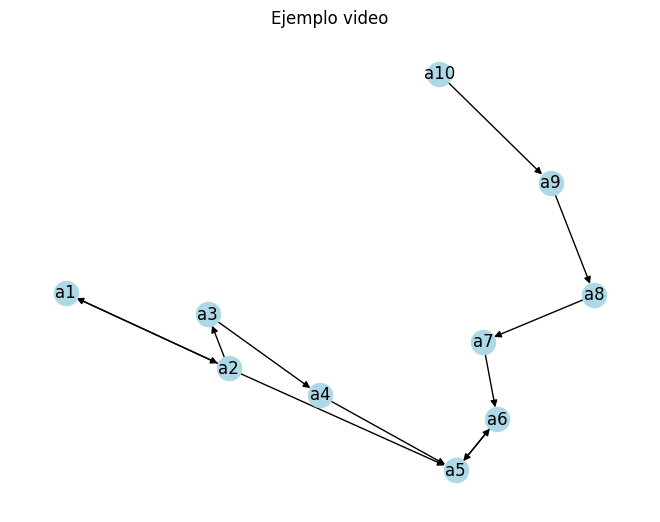

In [67]:
a1 = NodoArgumento("a1")
a2 = NodoArgumento("a2")
a3 = NodoArgumento("a3")
a4 = NodoArgumento("a4")
a5 = NodoArgumento("a5")
a6 = NodoArgumento("a6")
a7 = NodoArgumento("a7")
a8 = NodoArgumento("a8")
a9 = NodoArgumento("a9")
a10 = NodoArgumento("a10")
a10.ataca(a9)
a9.ataca(a8)
a8.ataca(a7)
a7.ataca(a6)
a6.ataca(a5)
a5.ataca(a6)
a4.ataca(a5)
a3.ataca(a4)
a2.ataca(a5)
a2.ataca(a3)
a2.ataca(a1)
a1.ataca(a2)
Grafo3 = GrafoArgumentativo("Ejemplo video", {a1,a2,a3,a4,a5,a6,a7,a8,a9,a10})
Grafo3.dibujar_grafo()

In [ ]:
print("Las extensiones preferidas calculadas son: " + str(calcular_extensiones_preferidas(Grafo3)[0]))
print("La extensión básica es: " + str(calculo_extension_basica(Grafo3)))

Las extensiones preferidas calculadas son: [{Nodo a10, Nodo a1, Nodo a5, Nodo a8, Nodo a3}, {Nodo a10, Nodo a4, Nodo a6, Nodo a2, Nodo a8}, {Nodo a10, Nodo a1, Nodo a6, Nodo a8, Nodo a3}]
La extensión básica es: {Nodo a10, Nodo a8}
